# Social media analysis
We are going to use a modified example taken from Wintjen M (2020) "Practical Analysis Using Jupyter Notebook" pp 264-

##  Set-up
> 1. install a non-standard python module nltk - natural language toolkit to add in functions we need
> 2. Add is pandas as pd and numpy as np
> 3. inline version matplotlib #look it up

In [1]:
! pip install nltk

#! pip install git+https://github.com/tweepy/tweepy.git

import nltk
import pandas as pd
import numpy as np
%matplotlib inline

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached regex-2021.11.10-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (763 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


## Next stage

In [2]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
anlysr=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## next stage
> 1. load in the tweet data
> 2. As a quick check see a few examples top of the list
> 3. Set up variables for out four categories

In [3]:
the_data=pd.read_csv('tweet_activity.csv')
the_data.head()
score_compound=[]
score_positive=[]
score_negative=[]
score_neutral=[]

## next step

In [4]:
i=0
while (i<len(the_data)):
    my_anlysr=anlysr.polarity_scores(the_data.iloc[i]['Tweet text'])
    score_compound.append(my_anlysr['compound'])
    score_positive.append(my_anlysr['pos'])
    score_negative.append(my_anlysr['neg'])
    score_neutral.append(my_anlysr['neu'])
    i=i+1


# Next step
> 1. Convert to numpy to make it easier to play with 
> 2. Add the scores into the Data Frame 
> 3. Display the first 10 items in the DataFrame

In [5]:
score_compound=np.array(score_compound)
score_positive=np.array(score_positive)
score_negative=np.array(score_negative)
score_neutral=np.array(score_neutral)

the_data['Compound score']=score_compound
the_data['Positive score']=score_positive
the_data['Negative score']=score_negative
the_data['Neutral score']=score_neutral

the_data.head(5)

,Tweet text,Compound score,Positive score,Negative score,Neutral score
0,Digging into Big Provenance (with SPADE) https...,0.0000,0.000,0.000,1.000
1,The Road Ahead for Augmented Reality https://t...,0.0000,0.000,0.000,1.000
2,Computational Thinking for Professionals https...,0.0000,0.000,0.000,1.000
3,What makes university students steer clear of ...,0.3818,0.191,0.000,0.809
4,Caught on camera: Using AI to combat street cr...,-0.7096,0.000,0.371,0.629


## Next Step

In [11]:
loop=0
pred_sentiment=[]
while (loop<len(the_data)):
    if ((the_data.iloc[loop]['Compound score'])>0.3):
        pred_sentiment.append('+')
    elif ((the_data.iloc[loop]['Compound score']>=0) & (the_data.iloc[loop]['Compound score']<0.3)):
        pred_sentiment.append('0')
    else:
        pred_sentiment.append('-')
    loop=loop+1
the_data['Prediction']=pred_sentiment
the_data.head(20)
    

,Tweet text,Compound score,Positive score,Negative score,Neutral score,Prediction
0,Digging into Big Provenance (with SPADE) https...,0.0000,0.000,0.000,1.000,0
1,The Road Ahead for Augmented Reality https://t...,0.0000,0.000,0.000,1.000,0
2,Computational Thinking for Professionals https...,0.0000,0.000,0.000,1.000,0
3,What makes university students steer clear of ...,0.3818,0.191,0.000,0.809,+
4,Caught on camera: Using AI to combat street cr...,-0.7096,0.000,0.371,0.629,-
5,Avoid a privacy nightmare with 'Lean Privacy R...,-0.2960,0.000,0.196,0.804,-
6,"Algorithms can decide your marks, your work pr...",0.8225,0.314,0.000,0.686,+
7,Amazon-sponsored artwork that 'learns' debuts ...,0.0000,0.000,0.000,1.000,0
8,@CCCU_games @SocioViz @CanterburyCCUni @christ...,0.0000,0.000,0.000,1.000,0
9,@CCCU_games @SocioViz @CanterburyCCUni @christ...,0.8625,0.350,0.000,0.650,+


## next step

<AxesSubplot:ylabel='Prediction'>

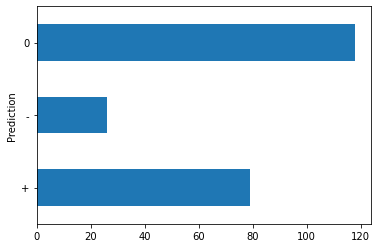

In [12]:
the_data.groupby('Prediction').size().plot(kind='barh')